<a href="https://colab.research.google.com/github/ass007-mouele/python/blob/master/Regression_House_sales_Assoni_Mouele.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("https://raw.githubusercontent.com/murpi/wilddata/master/quests/kc_house_data.csv")
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


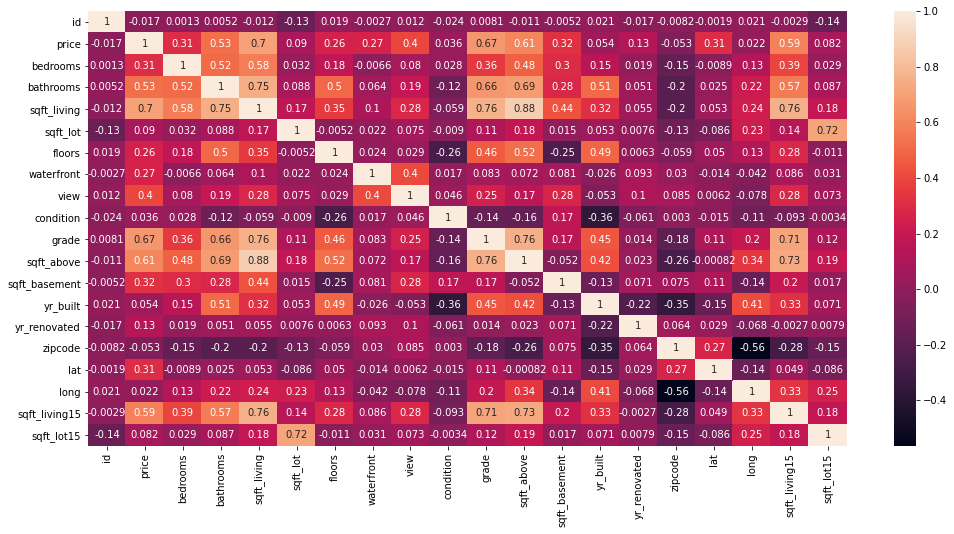

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
sqft_living,-0.012258,0.70204,0.576671,0.754665,1.0,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.19943,0.052529,0.240223,0.75642,0.183286


In [0]:
correlated=df.corr()
a=correlated.loc[correlated['price']!=1 ,:] # On elimine d'abord la ligne price qui est egal a 1
most_correlated=a.loc[a['price']==max(a['price'])] # La ligne dont la valeur est la plus elevé dans la colonne price
print("the most correlated is \n",most_correlated.index)

plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [0]:
df.isna().sum()
df_clean=df.loc[df['price'].isna()==False,:] #On divise la dataframe en deux une partie sans valeur null dans la colonne prix et l'autre avec
df_nan=df.loc[df['price'].isna()==True,:]

In [0]:
#grade,sqft_above,bathrooms
X=df_clean[['sqft_living','lat']] #les colonnes avec un meilleur score 
y=df_clean['price']
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=1, train_size = 0.80)
modelPrice=LinearRegression().fit(X_train, y_train)#on entraine le model
modelPrice.score(X, y) # le score avec les variables choisi

0.5656938663886258

In [0]:
X=df_nan[['sqft_living','lat']]
print("la prediction de prix pour les 4 valeurs de prix vides\n",modelPrice.predict(X))

la prediction de prix pour les 4 valeurs de prix vides
 [566387.68996605 280162.069874   393064.95092998 279949.36864068]


In [0]:
df_nan['price']=modelPrice.predict(X) #On remplace les valeurs nulles par celles predits
df_nan['price']=round(df_nan['price'])
df_complete=pd.merge(df_clean,df_nan,how='outer') # on fait un merge des deux bouts pour obtenir un tableau final complet
df_complete
#pd.concat([df_clean,df_nan],axis=0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,566388.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,280162.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,393065.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
